# Heart Attack Prediction

- Objectif : Dans ce travail nous sommes confrontés à un problème de classification dont l'objectif est d'entrainer un modèle pour savoir si un patient présente un risque d'attaque cardiaque ou pas, bien évidemment en fonction de certains paramètres. 
- Problème de classification : Problème dans lequel on cherche à prédire la valeur d'une variable discrète.

- Avant tout, nous allons nous focaliser sur l'EDA et le preprocessing qui constitueront les parties principales de ce projet.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


plt.style.use('ggplot')

In [3]:
# pd.set_option('display.max_column', 25)   
data = pd.read_csv('heart_attack_prediction_dataset.csv')
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df = data.copy()

##  EDA (Exploratory Data Analysis)

### Checklist de base
#### Analyse de forme

- Variable Target : Heart Attack Risk
- Lignes et colonnes : 8763, 25
- types de variables : qualitatives : 6, quantitatives : 19
- Analyse des valeurs manquantes : Il n' ya aucune valeur manquante dans notre dataset idem pour les lignes duppliquées.
- Je vais splitter la colonne Blood Pressure pour avoir d'une part la pression systolique et d'autre part la pression diastolique, et à partir de là effectuer des analyses en fonction de l'age, du sexe et de l'état de santé des individus.

#### Analyse de fond

- Visualisation de la target : On constate qu'on a près de 3139 soit 35.82% présentant un risque d'attaque cardiaque et 5624 soit 64.17% ne présentant pas.
- Signification des variables : On peut dire qu'il y'a beaucoup de variables renvoyant du booléen. J'ai dû faire une petite transformation ie les regrouper entre elles, pour effectuer l'analyse sous un autre angle.
- Relations entre les variables booléennes et la target : En comparant les resultats obtenus, on peut dire que la valeur true chez la variable renvoie pour ce qui est du risque = 1 un nombre de cas << à celui ou le risque = 0
- Relations entre les variables du  bool_corr : Après avoir tracé le clustermap de bool_corr, on observe peu ou presque pas de correlations ou de relations entre ces variables.
- Le tracé de l'histogramme des variables continues pour observer la distribution sur les colonnes de type float me renvoie 02 sortes de distribution : une distribution uniforme (chaque colonne a la même probabilité d'être sélectionnée) et une distribution de Skewed (ou distribution asymétrique);  pou cette 2e distribution, pour une etude plus approfondie on pourrait se servir des mesures de tendance centrale telles que la médiane.

### Analyse de la Forme

In [5]:
df.shape

(8763, 26)

In [6]:
df = df.drop(['Patient ID', 'Hemisphere'], axis = 1)

In [7]:
df.dtypes.value_counts()

int64      16
object      5
float64     3
Name: count, dtype: int64

In [8]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,4.963459,285768,27.194973,235,1,7,Canada,North America,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9,9.463426,235282,28.176571,587,4,4,France,Europe,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,9,7.648981,125640,36.464704,378,3,4,Canada,North America,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,0


In [9]:
(df.isna().sum() / df.shape[0]).sort_values()

Age                                0.0
Country                            0.0
Sleep Hours Per Day                0.0
Physical Activity Days Per Week    0.0
Triglycerides                      0.0
BMI                                0.0
Income                             0.0
Sedentary Hours Per Day            0.0
Stress Level                       0.0
Medication Use                     0.0
Previous Heart Problems            0.0
Diet                               0.0
Exercise Hours Per Week            0.0
Alcohol Consumption                0.0
Obesity                            0.0
Smoking                            0.0
Family History                     0.0
Diabetes                           0.0
Heart Rate                         0.0
Blood Pressure                     0.0
Cholesterol                        0.0
Sex                                0.0
Continent                          0.0
Heart Attack Risk                  0.0
dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8763 non-null   int64  
 1   Sex                              8763 non-null   object 
 2   Cholesterol                      8763 non-null   int64  
 3   Blood Pressure                   8763 non-null   object 
 4   Heart Rate                       8763 non-null   int64  
 5   Diabetes                         8763 non-null   int64  
 6   Family History                   8763 non-null   int64  
 7   Smoking                          8763 non-null   int64  
 8   Obesity                          8763 non-null   int64  
 9   Alcohol Consumption              8763 non-null   int64  
 10  Exercise Hours Per Week          8763 non-null   float64
 11  Diet                             8763 non-null   object 
 12  Previous Heart Probl

In [11]:
df.duplicated().sum()

0

Separons la colonne Blood Pressure

In [12]:
def get_systol(col):
    return col.split("/")[0]

df['Systolic Pressure'] = df['Blood Pressure'].apply(get_systol)

In [13]:
def get_diastol(coll):
    return coll.split("/")[1]

df['Diastolic Pressure'] = df['Blood Pressure'].apply(get_diastol)

In [14]:
df['Diastolic Pressure'] = df['Diastolic Pressure'].astype(int)
df['Systolic Pressure'] = df['Systolic Pressure'].astype(int)

In [15]:
df['Blood Pressure'] = df['Systolic Pressure'] / df['Diastolic Pressure']

In [16]:
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Heart Attack Risk,Systolic Pressure,Diastolic Pressure
0,67,Male,208,1.795455,72,0,0,1,0,0,...,261404,31.251233,286,0,6,Argentina,South America,0,158,88
1,21,Male,389,1.774194,98,1,1,1,1,1,...,285768,27.194973,235,1,7,Canada,North America,0,165,93
2,21,Female,324,1.757576,72,1,0,0,0,0,...,235282,28.176571,587,4,4,France,Europe,0,174,99
3,84,Male,383,1.630000,73,1,1,1,0,1,...,125640,36.464704,378,3,4,Canada,North America,0,163,100
4,66,Male,318,1.034091,93,1,1,1,1,0,...,160555,21.809144,231,1,5,Thailand,Asia,0,91,88


In [17]:
df.shape

(8763, 26)

## Analyse de fond

In [18]:
print(df['Heart Attack Risk'].value_counts())
print('------------------------------------------------------')
print(df['Heart Attack Risk'].value_counts(normalize = True))

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64
------------------------------------------------------
Heart Attack Risk
0    0.641789
1    0.358211
Name: proportion, dtype: float64


##### On peut constater qu'il existe beaucoup de colonnes contenant des variables booleennes, je vais donc les regrouper entre elles pour une analyse plus approfondie; sachant que 1 = yes ou true, 0 = false, no

In [19]:
bool_col = df.drop(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 
                    'Exercise Hours Per Week', 'Diet', 'Stress Level', 'Sedentary Hours Per Day',
                    'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Income',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Diastolic Pressure', 'Systolic Pressure'], axis = 1)

In [20]:
bool_col = bool_col.drop('Heart Attack Risk', axis = 1)

In [21]:
bool_col.head()

,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Previous Heart Problems,Medication Use
0,0,0,1,0,0,0,0
1,1,1,1,1,1,1,0
2,1,0,0,0,0,1,1
3,1,1,1,0,1,1,0
4,1,1,1,1,0,1,0


#### Relation entre les variables booleennes et la target

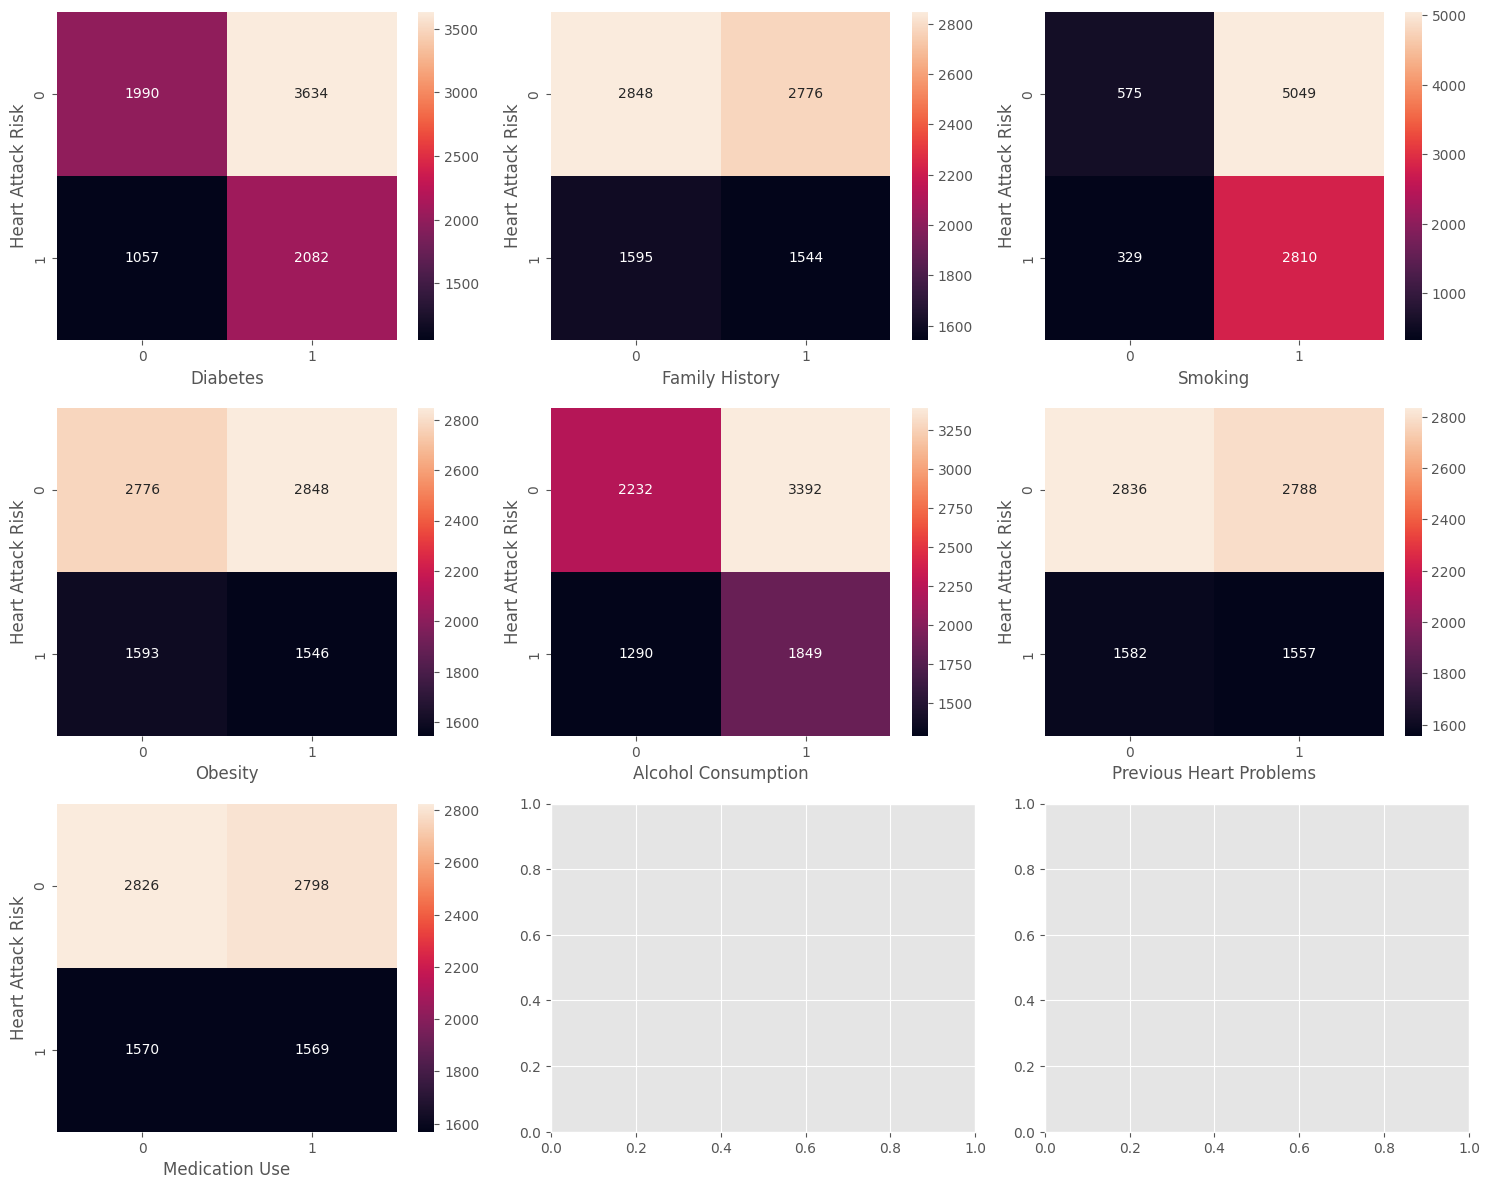

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for i, col in enumerate(bool_col):
    sns.heatmap(pd.crosstab(df['Heart Attack Risk'], df[col]), annot=True, fmt='d', ax=axes[i//3, i%3])
    if i == 7:
        break
    
plt.tight_layout()
plt.show()

Verification d'une possible relation ou correlation entre les variables booléennes

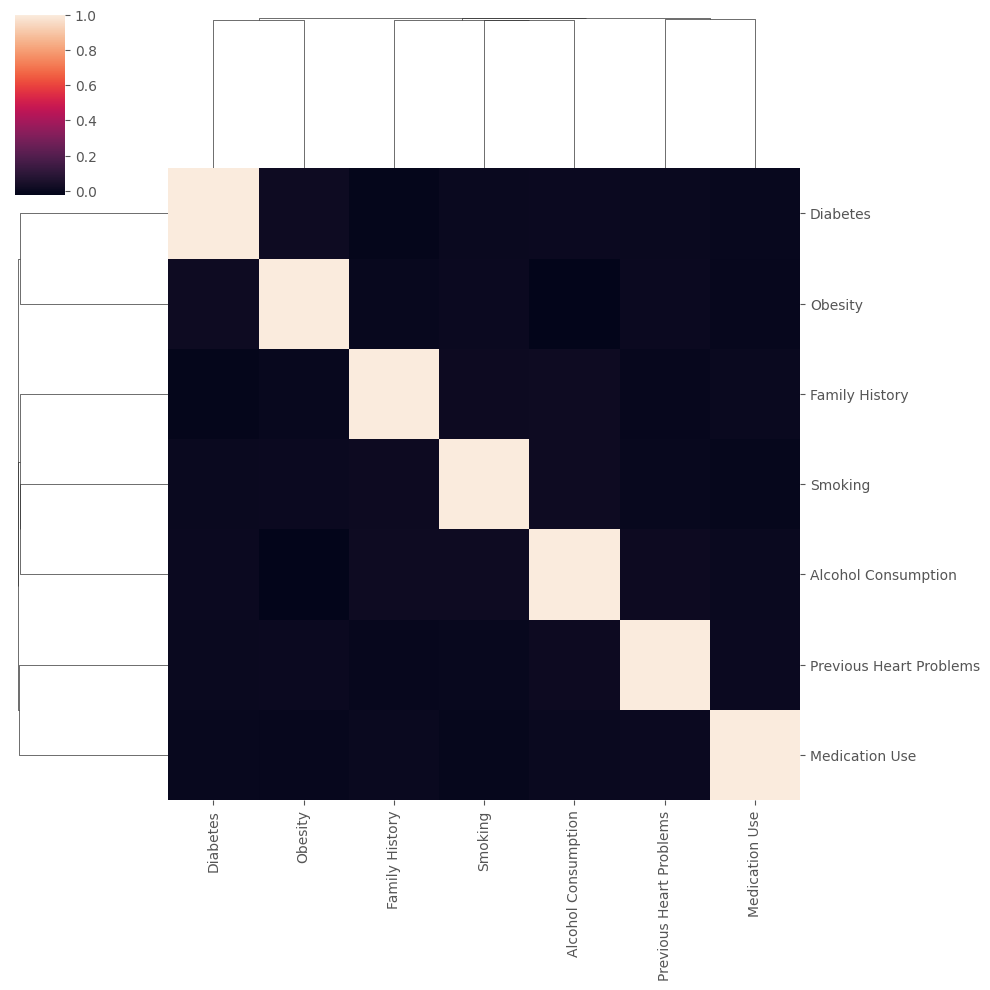

In [23]:
sns.clustermap(bool_col.corr())

### Histogramme des variables continues

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


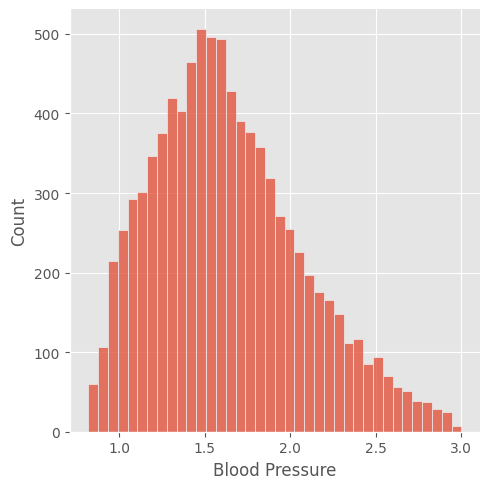

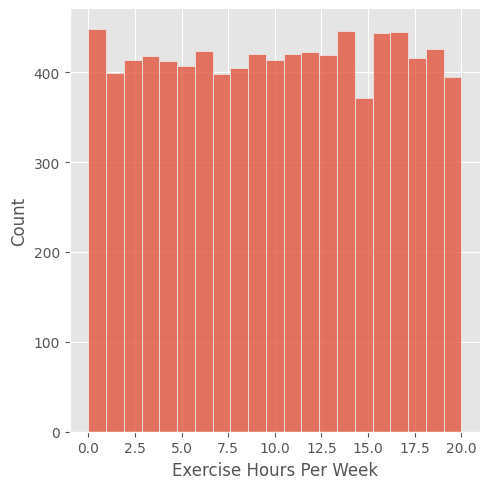

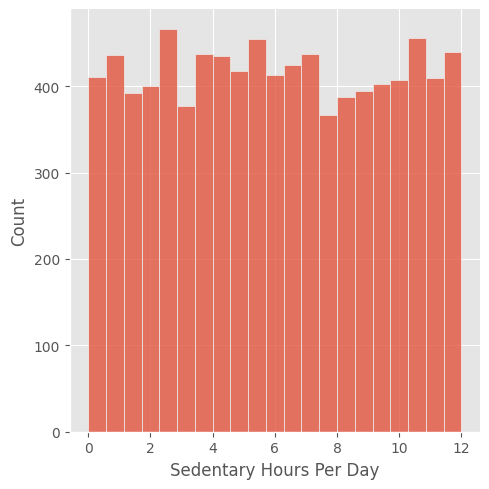

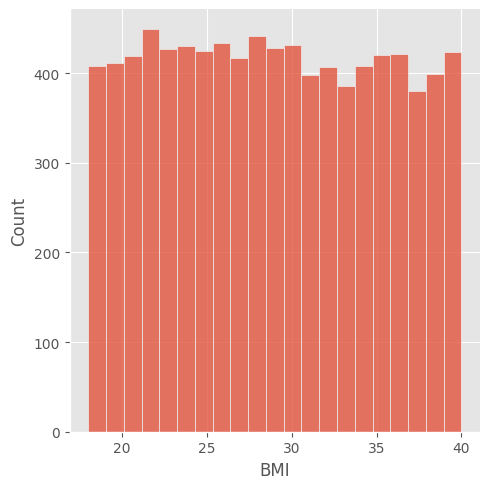

In [24]:
for col in df.select_dtypes('float'):
    sns.displot(df[col])

In [25]:
# import seaborn as sns

# sns.histplot(df['BMI'], kde=True)

In [26]:
other_Int_col = df.drop(['Sex', 'Blood Pressure', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet', 
       'Previous Heart Problems', 'Medication Use', 'BMI', 
       'Country', 'Continent', 'Heart Attack Risk',
       'Systolic Pressure', 'Diastolic Pressure'], axis = 1)

In [27]:
other_Int_col = other_Int_col.drop('Sedentary Hours Per Day', axis = 1)

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\HP\AppData\Local\Programs\Pytho

<Figure size 640x480 with 0 Axes>

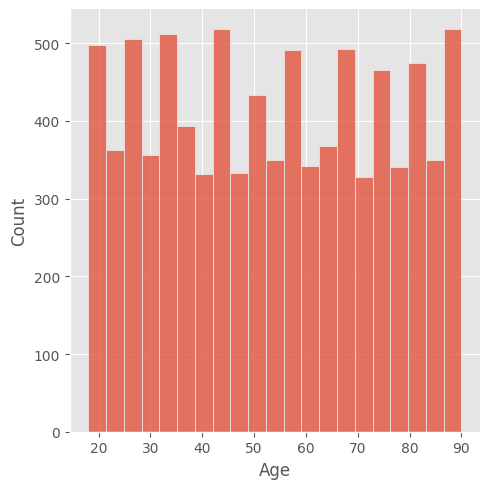

<Figure size 640x480 with 0 Axes>

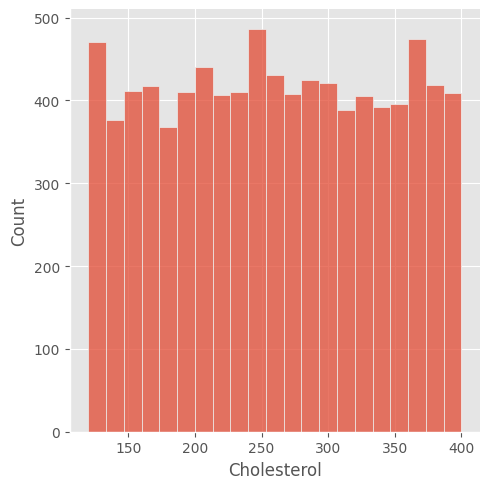

<Figure size 640x480 with 0 Axes>

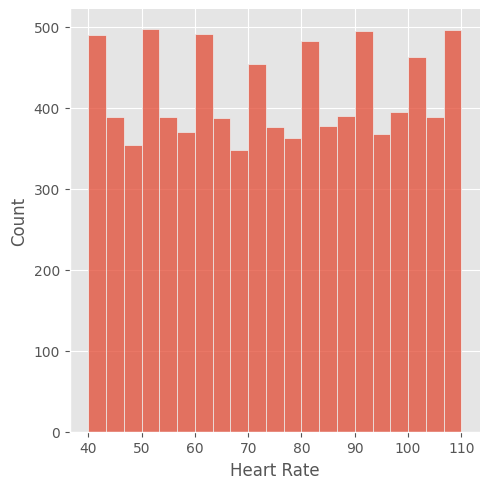

<Figure size 640x480 with 0 Axes>

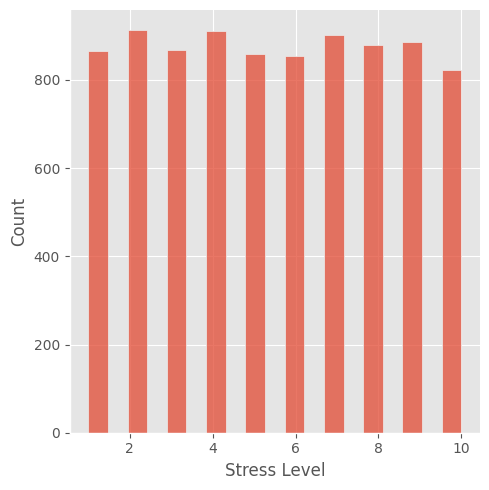

<Figure size 640x480 with 0 Axes>

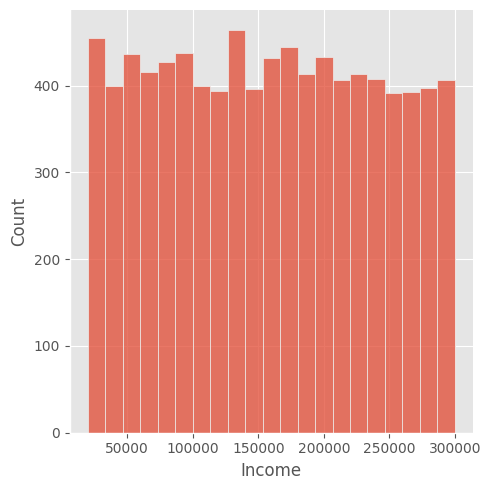

<Figure size 640x480 with 0 Axes>

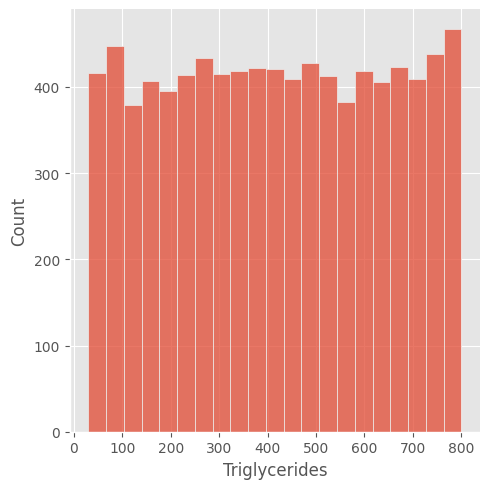

<Figure size 640x480 with 0 Axes>

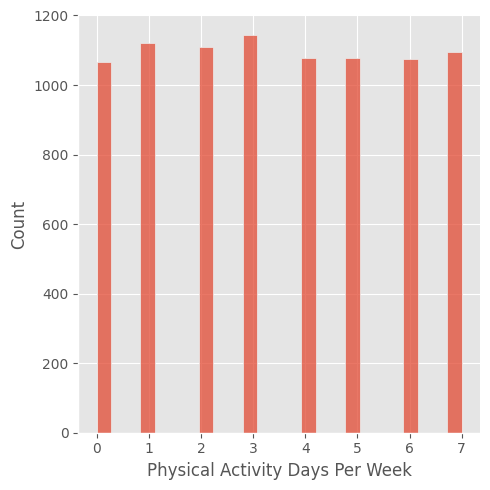

<Figure size 640x480 with 0 Axes>

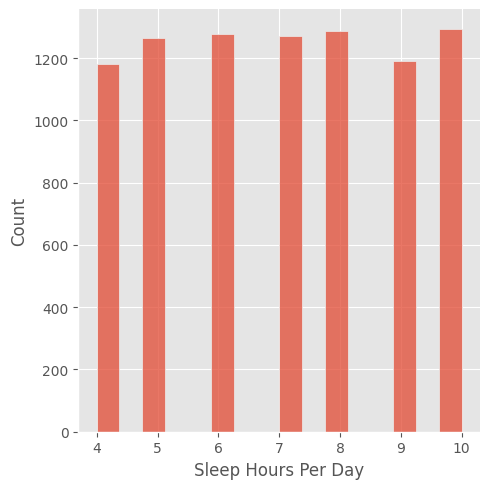

In [28]:
for col in other_Int_col:
    plt.figure()
    sns.displot(df[col])

In [29]:
for col in df.select_dtypes('object'):
    print(f'{col :-<30} {df[col].unique()}')

Sex--------------------------- ['Male' 'Female']
Diet-------------------------- ['Average' 'Unhealthy' 'Healthy']
Country----------------------- ['Argentina' 'Canada' 'France' 'Thailand' 'Germany' 'Japan' 'Brazil'
 'South Africa' 'United States' 'Vietnam' 'China' 'Italy' 'Spain' 'India'
 'Nigeria' 'New Zealand' 'South Korea' 'Australia' 'Colombia'
 'United Kingdom']
Continent--------------------- ['South America' 'North America' 'Europe' 'Asia' 'Africa' 'Australia']


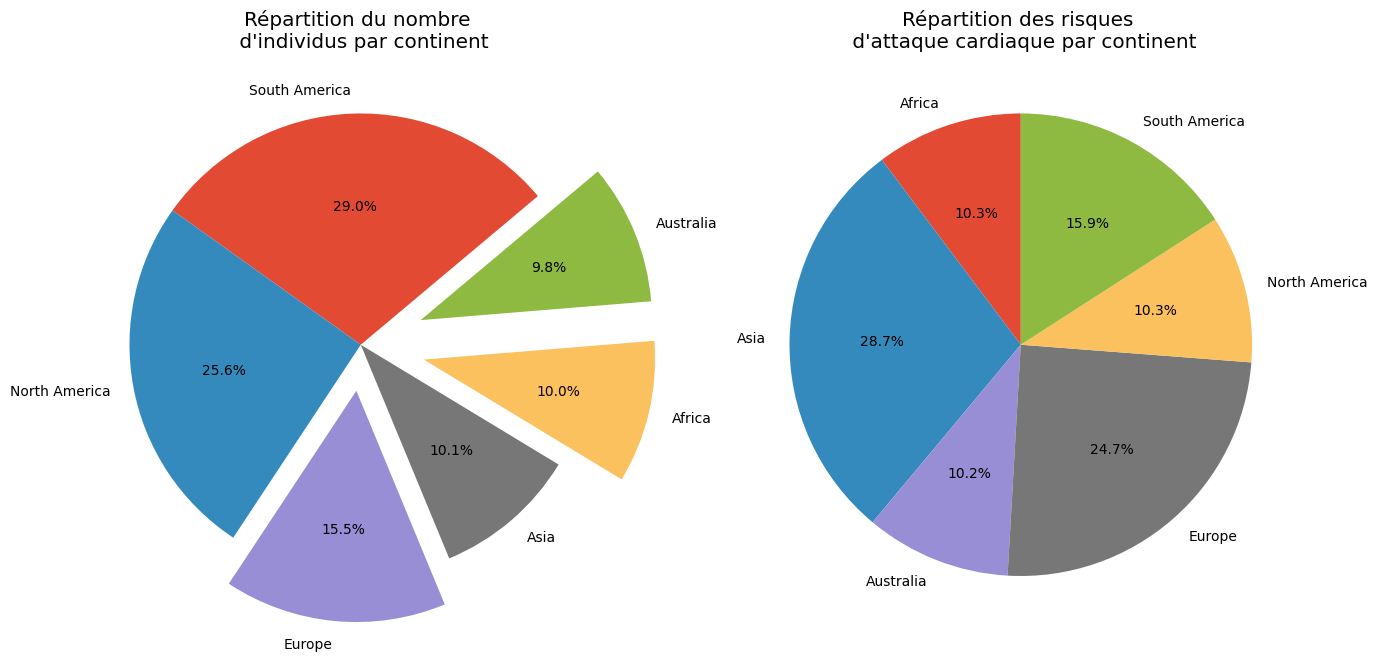

In [30]:
liste = df['Continent'].value_counts(normalize = True)

liste2 = []
for elt in liste:
    liste2.append(elt)

labels = df['Continent'].unique()
percent = liste2
explode = (0,0,0.2,0,0.28,0.28) # decalage

plt.figure(figsize = (14, 8))

plt.subplot(1, 2, 1)
plt.title('Répartition du nombre \n d\'individus par continent')
pie = plt.pie(percent, explode = explode, labels=labels, autopct="%.1f%%", startangle = 40)

plt.subplot(1, 2, 2)
df_heart_attack_1 = df[df['Heart Attack Risk'] == 1]
grouped_data = df_heart_attack_1.groupby('Continent')['Heart Attack Risk'].count()

# Afficher le diagramme circulaire
grouped_data.plot.pie(autopct='%1.1f%%', startangle = 90)
plt.title('Répartition des risques \n d\'attaque cardiaque par continent')
plt.ylabel('')  # Pour supprimer le libellé de l'axe y

plt.tight_layout()

<Axes: ylabel='Country'>

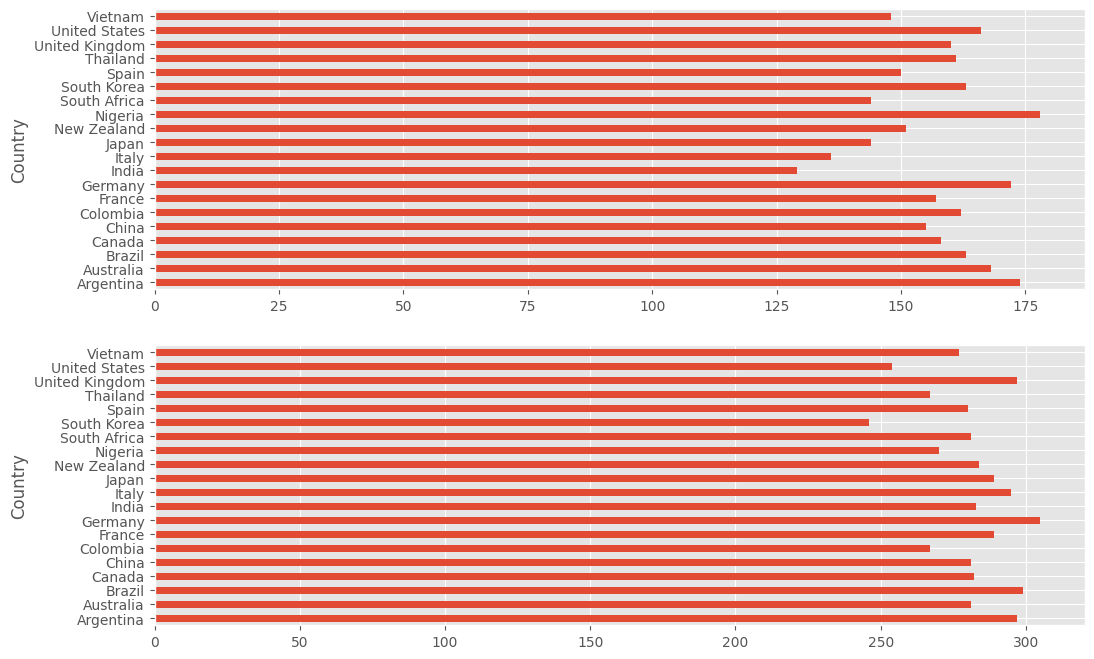

In [31]:
plt.figure(figsize = (12, 8))

plt.subplot(2, 1, 1)
df[df['Heart Attack Risk'] == 1].groupby('Country').size().plot.barh()

plt.subplot(2, 1, 2)
df[df['Heart Attack Risk'] == 0].groupby('Country').size().plot.barh()

In [32]:
# df[df['Heart Attack Risk'] == 1].groupby('Blood Pressure').size().plot.bar()

sns.countplot(x = 'Age', hue = 'Blood Pressure', data = df)

KeyboardInterrupt: 

### Relation Target / Variable

<Axes: xlabel='Age', ylabel='count'>

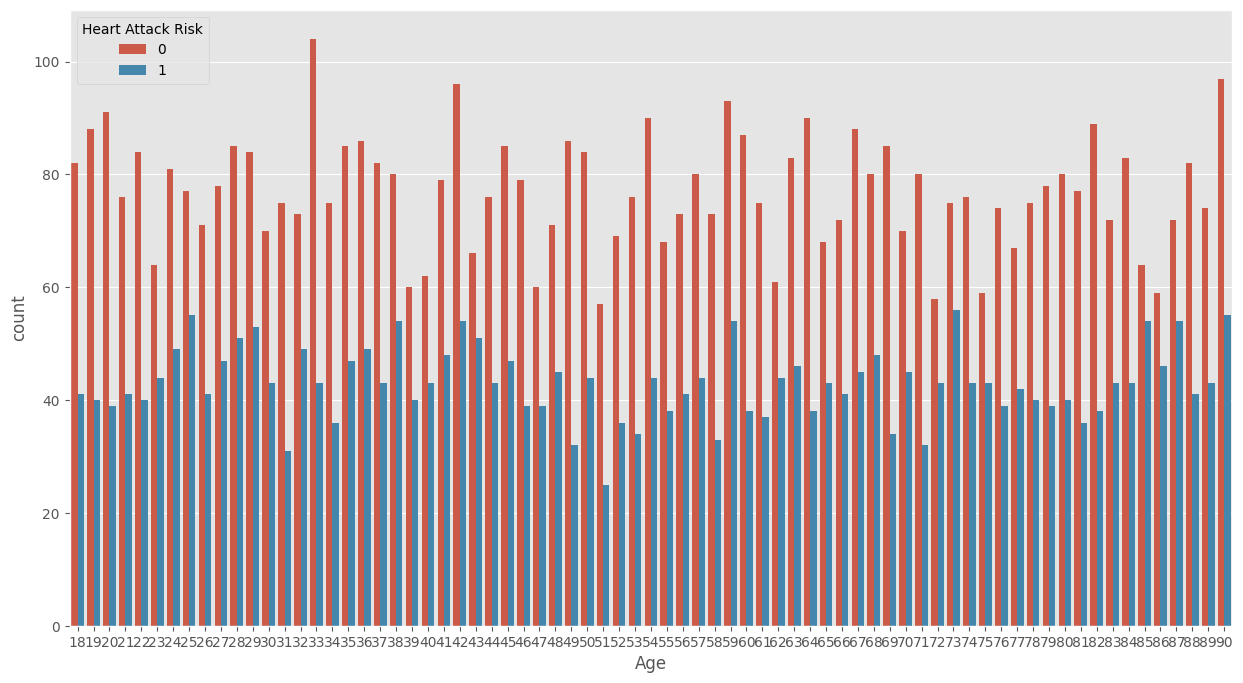

In [33]:
plt.figure(figsize = (15, 8))

sns.countplot(x = 'Age', hue = 'Heart Attack Risk', data = df)

### Verifions les correlations entre certaines variables et la variable cible

In [34]:
X = df.drop(['Diet', 'Country', 'Continent'], axis = 1)

In [35]:
X = X.drop(['Systolic Pressure', 'Diastolic Pressure'], axis = 1)

In [36]:
X = X.drop('Sex', axis = 1)

<Axes: >

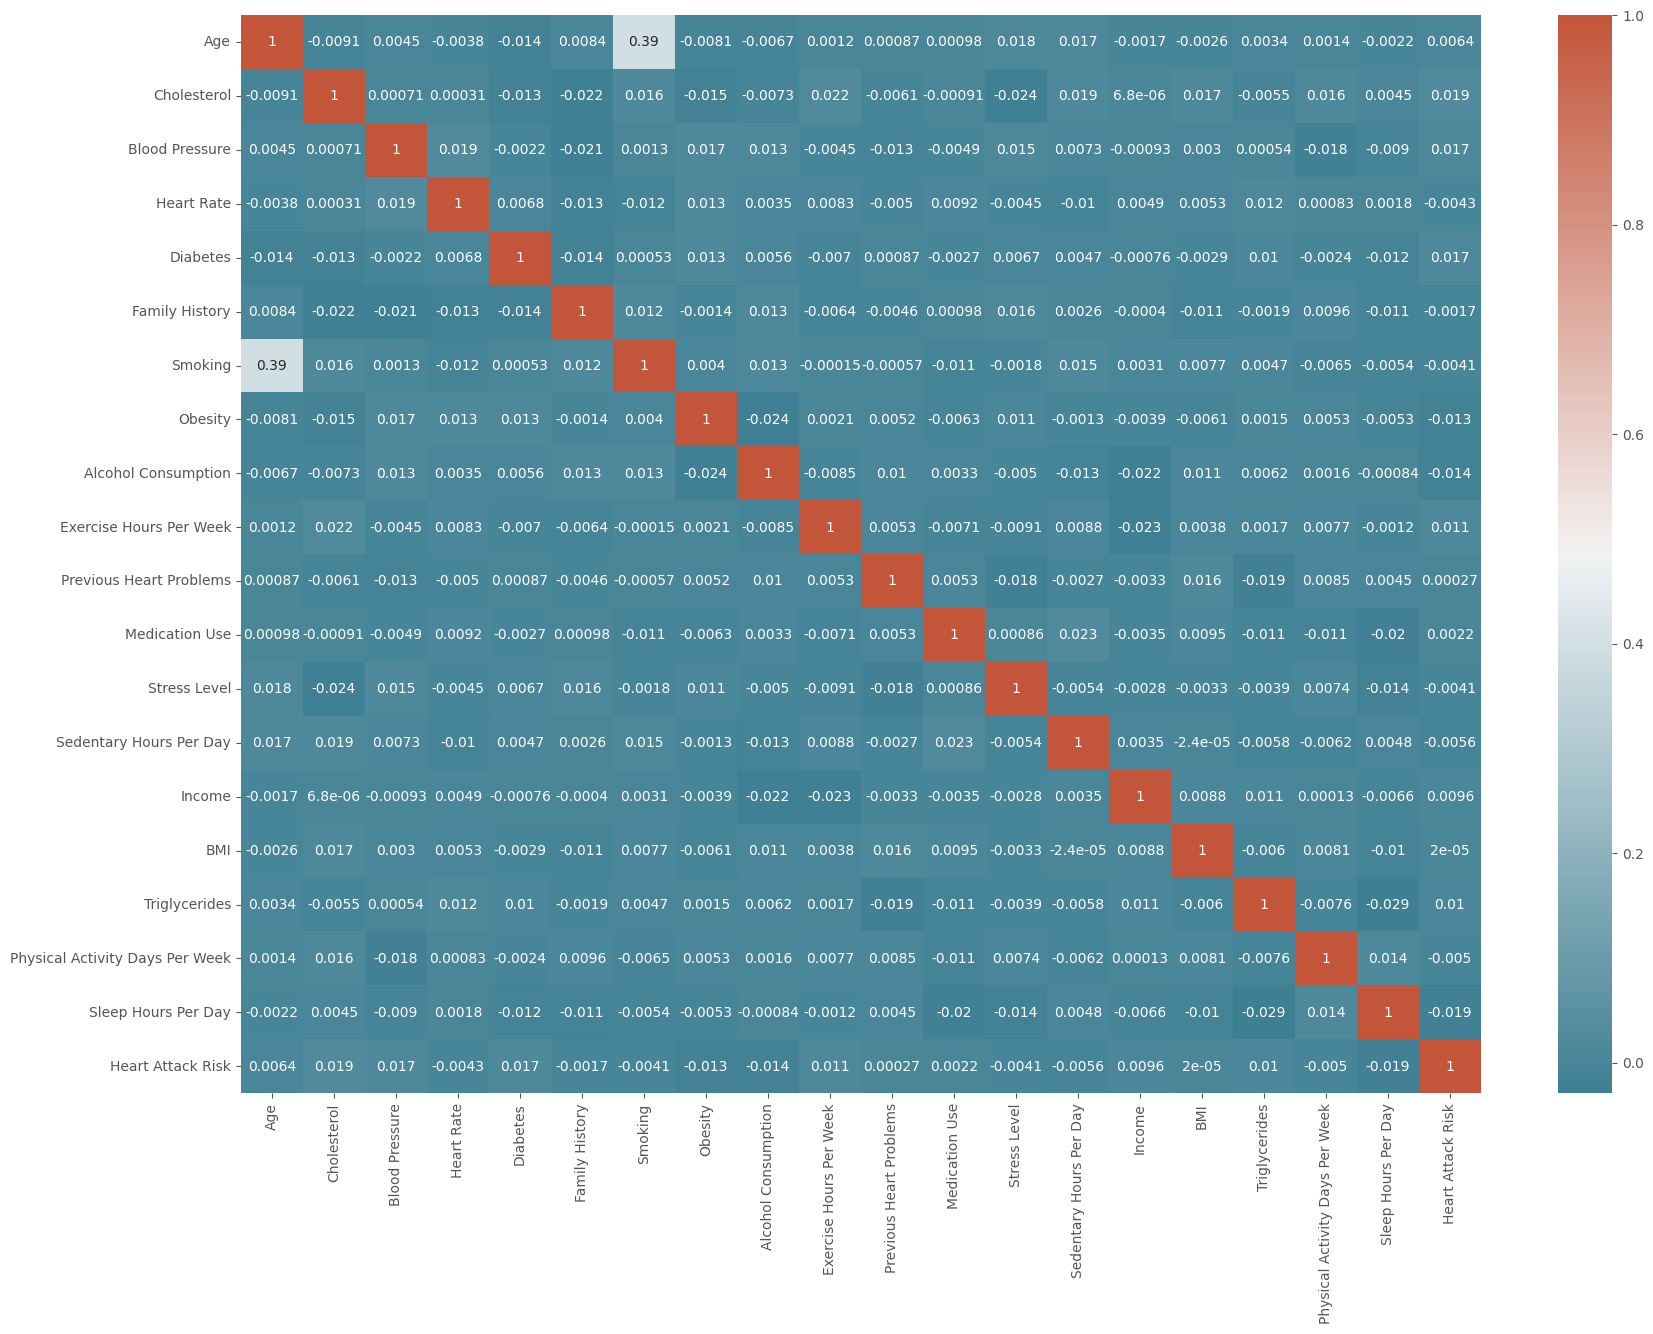

In [37]:
plt.figure(figsize = (20, 14))
sns.heatmap(X.corr(), xticklabels = X.corr().columns, yticklabels = X.corr().columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True))

In [ ]:
df.to_csv('Heart_attack_clean.csv')